In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns;
sns.set()
from sklearn.datasets.samples_generator import make_blobs

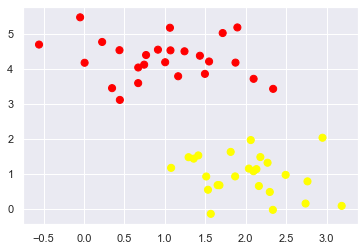

In [3]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

In [4]:
from sklearn.svm import SVC #SVC = Support Vector Classifier
model=SVC(kernel='linear',C=1E10) #SVM = Support Vector Machine
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
def plot_svc(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    p=model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,p,colors='k',levels=[-1,0,1],alpha=0.5,linestypes=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='blue');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


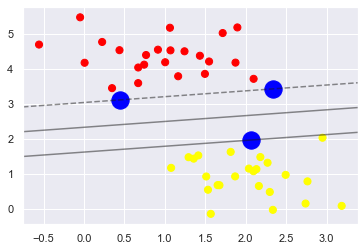

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc(model);

In [18]:
def plot_svm(N=10,ax=None):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc(model,ax)

C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


Text(0.5, 1.0, 'N=60')

C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


Text(0.5, 1.0, 'N=120')

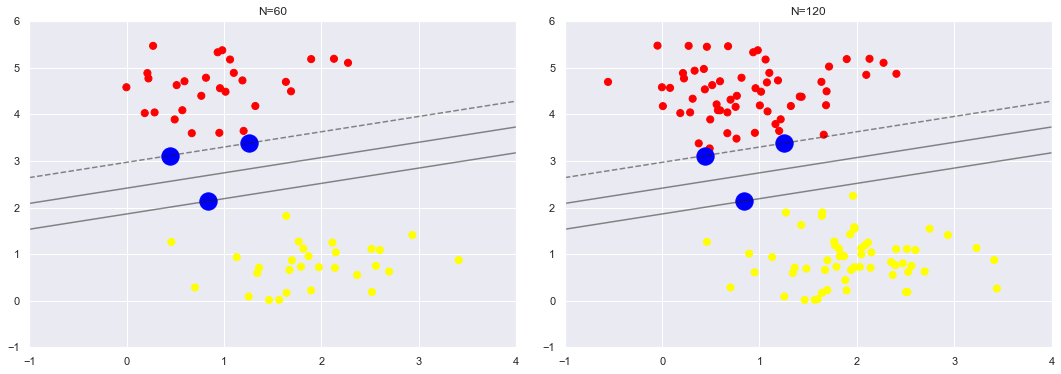

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


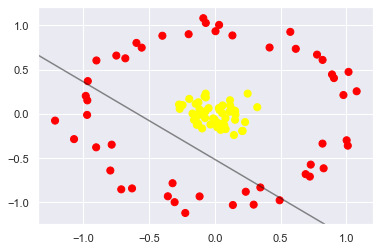

In [24]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc(clf,plot_support=False)

C:\Users\avish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


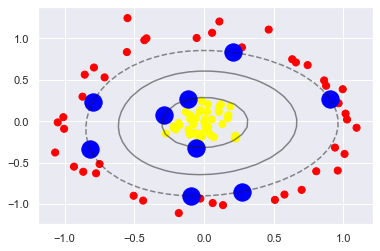

In [33]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='rbf',C=1E6).fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc(clf)

C:\Users\avish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

C:\Users\avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestypes'
  del sys.path[0]


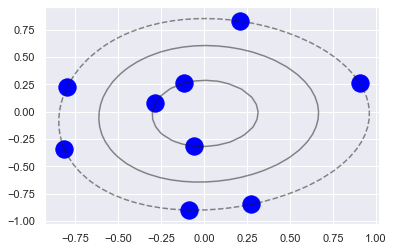

In [36]:
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolor='none');
clf.fit(X,y)
plot_svc(clf)